In [2]:
import numpy as np
from eryn.backends import HDFBackend as eryn_HDF_Backend
import matplotlib.pyplot as plt
import corner
import os
import warnings
import matplotlib.lines as mlines
from matplotlib.font_manager import FontProperties
plt.rcParams['font.size'] = 20

notebook_direc = os.getcwd()
plot_direc = notebook_direc + "/corner_plots"
run_direc = "/work/scratch/data/burkeol/kerr_few_paper/low_e0_simulations/"

os.listdir(run_direc)

['low_e0_Kerr_M_1e6_mu_25_a_0p998_p0_10p628_e0_0p0001_SNR_50_dt_5_T_2.h5',
 'low_e0_Kerr_M_1e6_mu_25_a_0p998_p0_10p628_e0_0p001_SNR_50_dt_5_T_2.h5']

In [3]:
# Now analyse the results using 9PN for circular orbits
    
def analyse_samples(file_path, discard = 0):
    reader = eryn_HDF_Backend(file_path,read_only = True)

    N_iterations = reader.get_chain()['model_0'].shape[0]
    N_temps = reader.get_chain()['model_0'].shape[1]
    N_walkers = reader.get_chain()['model_0'].shape[2]
    N_params = reader.get_chain()['model_0'].shape[-1]

    samples_after_burnin = [reader.get_chain(discard = discard)['model_0'][:,i].reshape(-1,N_params) 
                        for i in range(N_temps)]  # Take true chain]


    log_like = reader.get_log_like(discard = discard)
    plt.plot(log_like[:,0,:]);
    plt.xlabel(r'Iteration')
    plt.ylabel(r'Log likelihood')
    plt.show()
    return samples_after_burnin, reader, log_like, N_params,

def corner_plot(burned_samples, true_params, param_labels, corner_kwargs, title = r'Corner plot', plot_name = None):

    N_params = len(param_labels)
    true_params = true_params[0:N_params]
    trunc_samples = burned_samples[0][:,:N_params]
    print(trunc_samples.shape)
    
    samples_corner = np.column_stack(trunc_samples)

    figure = corner.corner(trunc_samples,bins = 30, color = 'blue', **corner_kwargs)

    
    axes = np.array(figure.axes).reshape((N_params, N_params))

    for i in range(N_params):
        ax = axes[i, i]
        ax.axvline(true_params[i], color="k")

    for yi in range(N_params):
        for xi in range(yi):
            ax = axes[yi, xi]
            ax.axhline(true_params[yi], color="k")
            ax.axvline(true_params[xi],color= "k")
            ax.plot(true_params[xi], true_params[yi], "sk")

    for ax in figure.get_axes():
        ax.tick_params(axis='both', labelsize=18)

    blue_line = mlines.Line2D([], [], color='blue', label=r'Posterior Distributions')
    black_line = mlines.Line2D([], [], color='black', label='True Value')

    # plt.legend(handles=[blue_line,black_line], fontsize = 65, frameon = True, bbox_to_anchor=(0.25, N_params), loc="upper right", title = title, title_fontproperties = FontProperties(size = , weight = 'bold'))
    # plt.subplots_adjust(left=-0.1, bottom=-0.1, right=None, top=None, wspace=0.15, hspace=0.15)
    if plot_name:
        plt.savefig(plot_name, bbox_inches = "tight")
    return figure



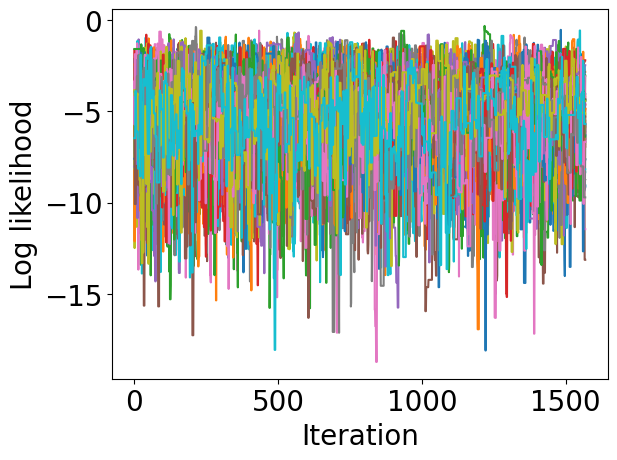

In [4]:
file_path = run_direc + 'low_e0_Kerr_M_1e6_mu_25_a_0p998_p0_10p628_e0_0p001_SNR_50_dt_5_T_2.h5'

samples_after_burnin_EMRI_log_e0_neg_3, reader_EMRI_e0_0p001, log_like_IMRI_EMRI_e0_0p001, N_params = analyse_samples(file_path, discard = 500)

(78450, 5)


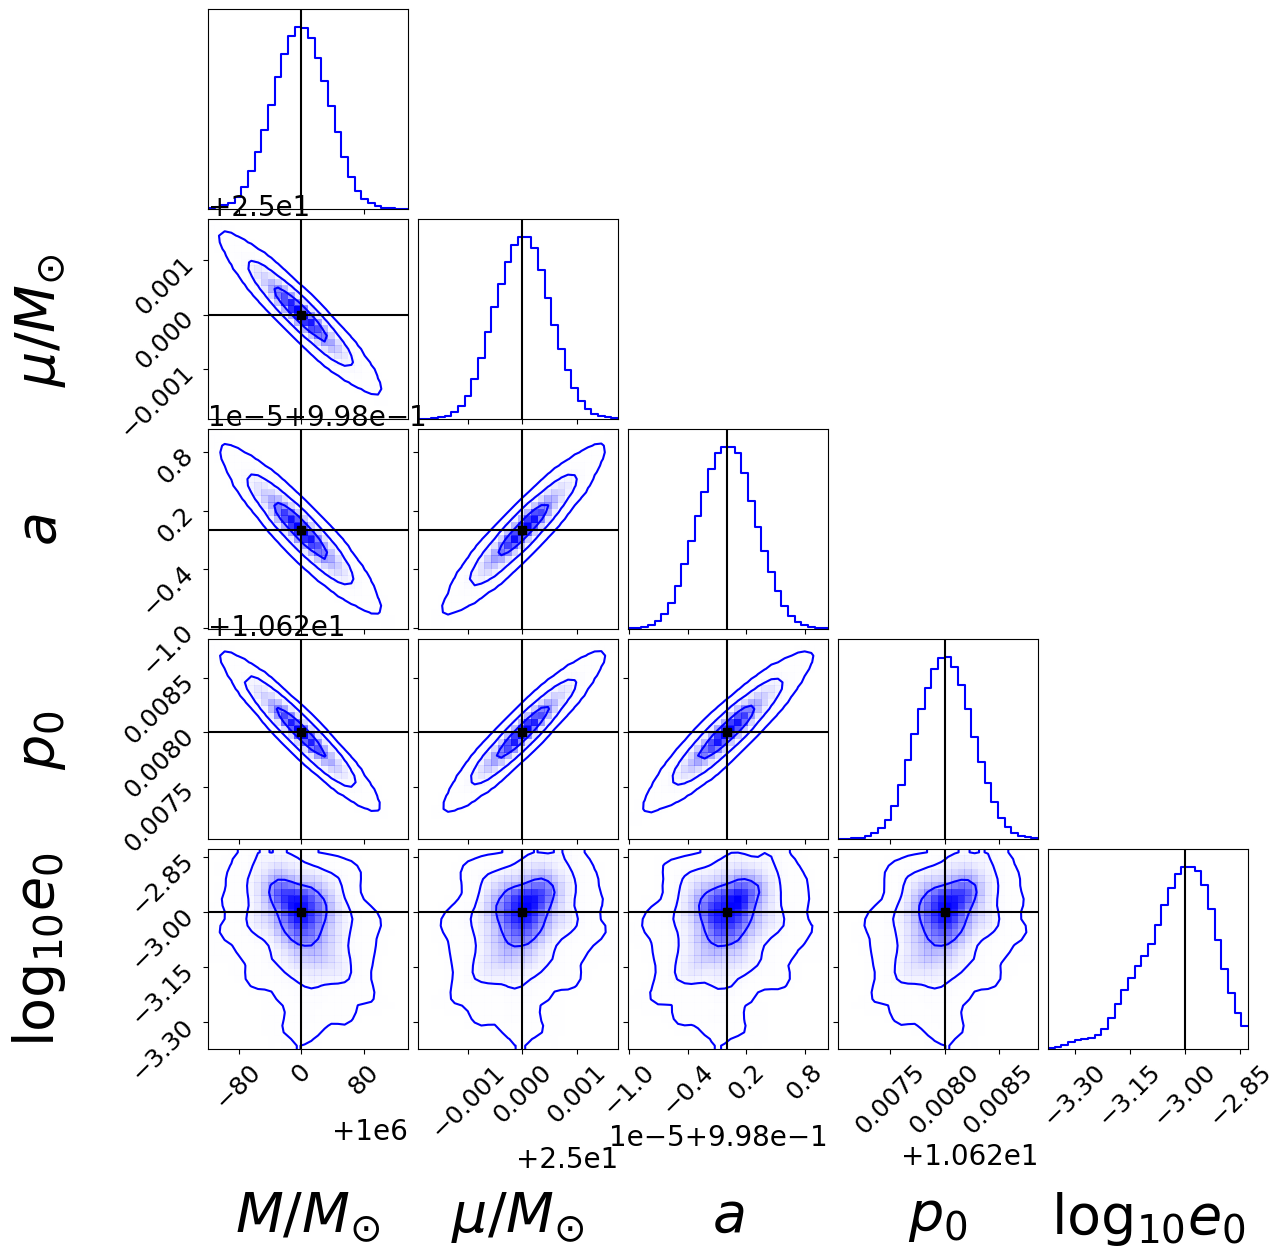

In [5]:
EMRI_plot_name_log_e0 = plot_direc + "/low_e0_Kerr_M_1e6_mu_25_a_0p998_p0_10p628_log_e0_0p001_SNR_50_dt_5_T_2.h5.png"

# params_label =[r"$M/M_{\odot}$", r"$\mu/M_{\odot}$", r"$a$", 
#                      r"$p_{0}$", r"$e_{0}$", r"$D_{s}/Gpc$", 
#                      r"$\theta_{S}$", r"$\phi_{S}$", r"$\theta_{K}$", r"$\phi_{K}$", 
#                      r"$\Phi_{\phi_{0}}$", r"$\Phi_{r_{0}}$"] 

params_label_log_e0 =[r"$M/M_{\odot}$", r"$\mu/M_{\odot}$", r"$a$", 
                     r"$p_{0}$", r"$\log_{10}e_{0}$"] 

true_vals = np.array([1e6,25,0.998, 10.628, np.log10(0.001), 7.28, 0.5, 1.2, 0.8, 0.2, 1.0, 3.0])

corner_kwargs = dict(plot_datapoints=False,smooth1d=True,
                       labels=params_label_log_e0, levels=(1 - np.exp(-0.5), 1 - np.exp(-2), 1 - np.exp(-9 / 2.)), 
                       label_kwargs=dict(fontsize=40), max_n_ticks=4,
                       show_titles=False, smooth = True, labelpad = 0.4)

figure_EMRI_0p001 = corner_plot(samples_after_burnin_EMRI_log_e0_neg_3, true_vals, params_label_log_e0, corner_kwargs, plot_name = EMRI_plot_name_log_e0)

In [6]:
# Now in original variables

samples_after_burnin_EMRI_e0_0p001 = samples_after_burnin_EMRI_log_e0_neg_3
samples_after_burnin_EMRI_e0_0p001[0][:,4] = 10**samples_after_burnin_EMRI_e0_0p001[0][:,4]

(78450, 12)


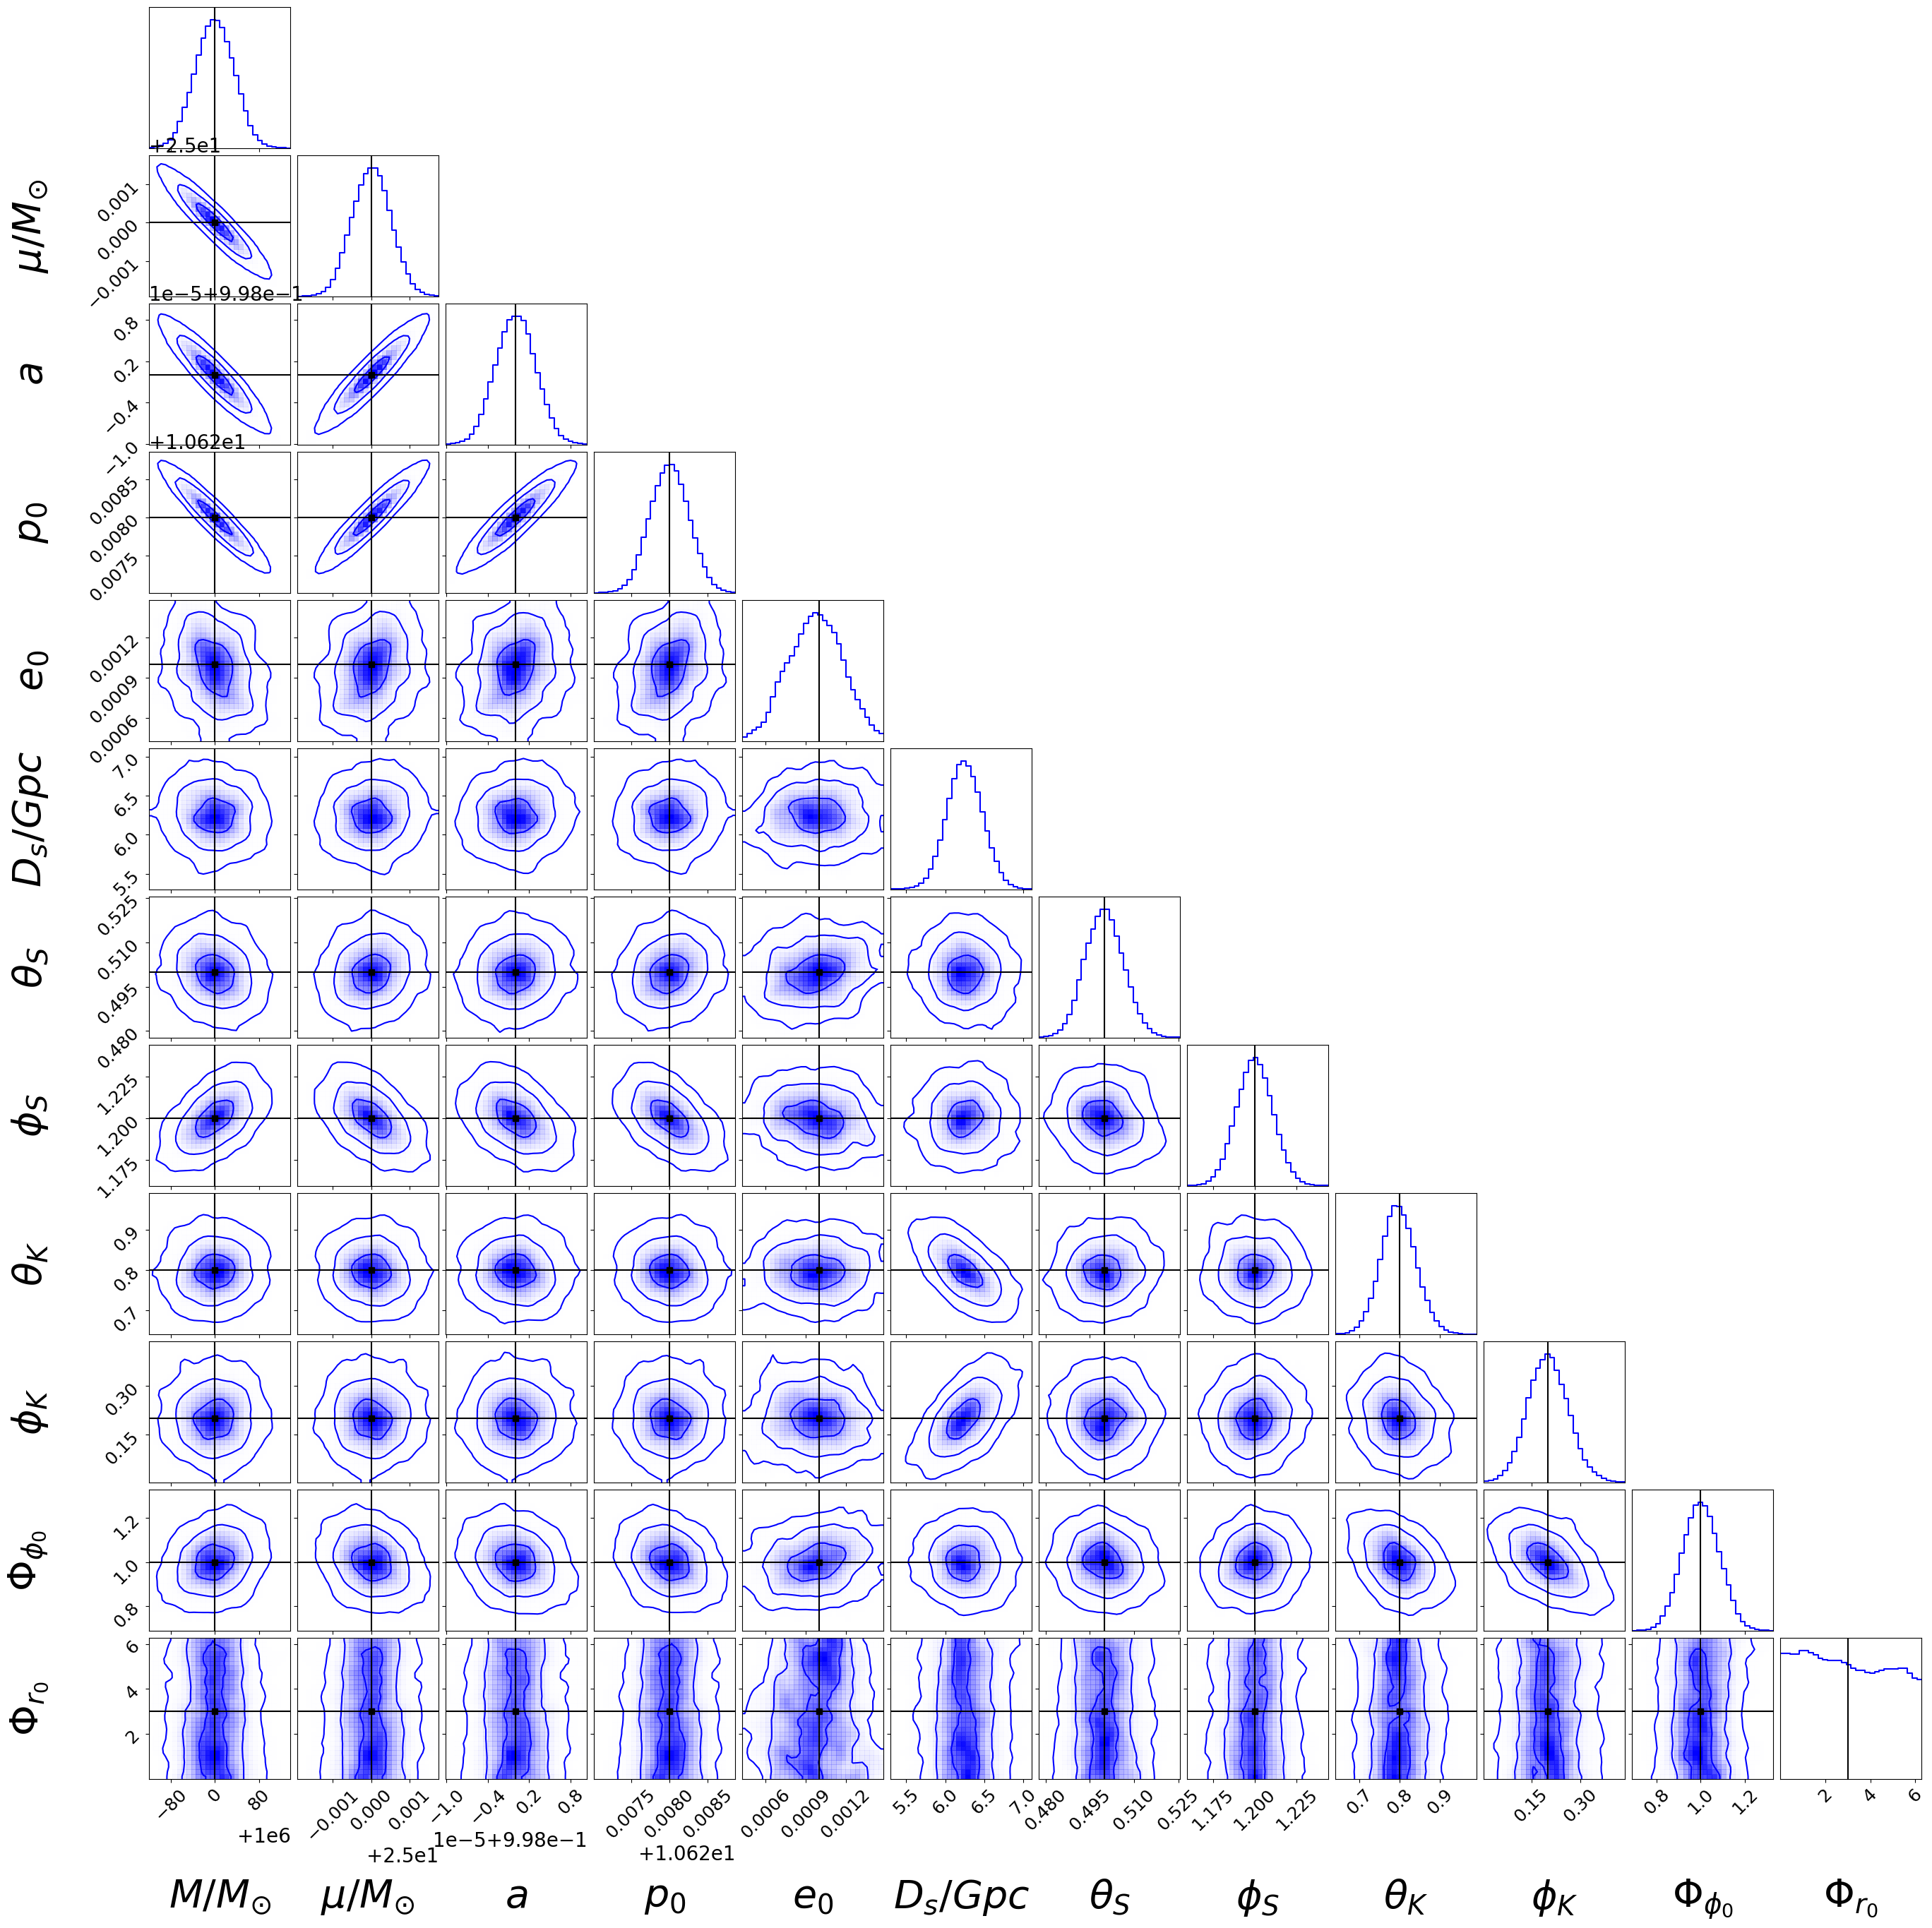

In [7]:


EMRI_plot_name_e0_0p001 = plot_direc + "/low_e0_Kerr_M_1e6_mu_25_a_0p998_p0_10p628_e0_0p001_SNR_50_dt_5_T_2.h5.png"

params_label_full =[r"$M/M_{\odot}$", r"$\mu/M_{\odot}$", r"$a$", 
                     r"$p_{0}$", r"$e_{0}$", r"$D_{s}/Gpc$", 
                     r"$\theta_{S}$", r"$\phi_{S}$", r"$\theta_{K}$", r"$\phi_{K}$", 
                     r"$\Phi_{\phi_{0}}$", r"$\Phi_{r_{0}}$"] 

# params_label_log_e0 =[r"$M/M_{\odot}$", r"$\mu/M_{\odot}$", r"$a$", 
#                      r"$p_{0}$", r"$e_{0}$"] 

true_vals = np.array([1e6,25,0.998, 10.628, 0.001, 7.28, 0.5, 1.2, 0.8, 0.2, 1.0, 3.0])

corner_kwargs = dict(plot_datapoints=False,smooth1d=True,
                       labels=params_label_full, levels=(1 - np.exp(-0.5), 1 - np.exp(-2), 1 - np.exp(-9 / 2.)), 
                       label_kwargs=dict(fontsize=40), max_n_ticks=4,
                       show_titles=False, smooth = True, labelpad = 0.4)

figure_EMRI_0p001 = corner_plot(samples_after_burnin_EMRI_e0_0p001, true_vals, params_label_full, corner_kwargs, plot_name = EMRI_plot_name_e0_0p001)


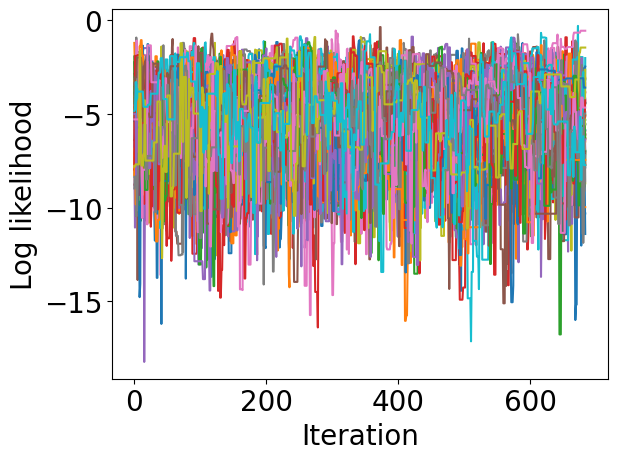

In [35]:
file_path = run_direc + 'low_e0_Kerr_M_1e6_mu_25_a_0p998_p0_10p628_e0_0p0001_SNR_50_dt_5_T_2.h5'

samples_after_burnin_EMRI_log_e0_neg_4, reader_EMRI_e0_0p0001, log_like_EMRI_e0_0p0001, N_params = analyse_samples(file_path, discard = 600)

(34200, 5)


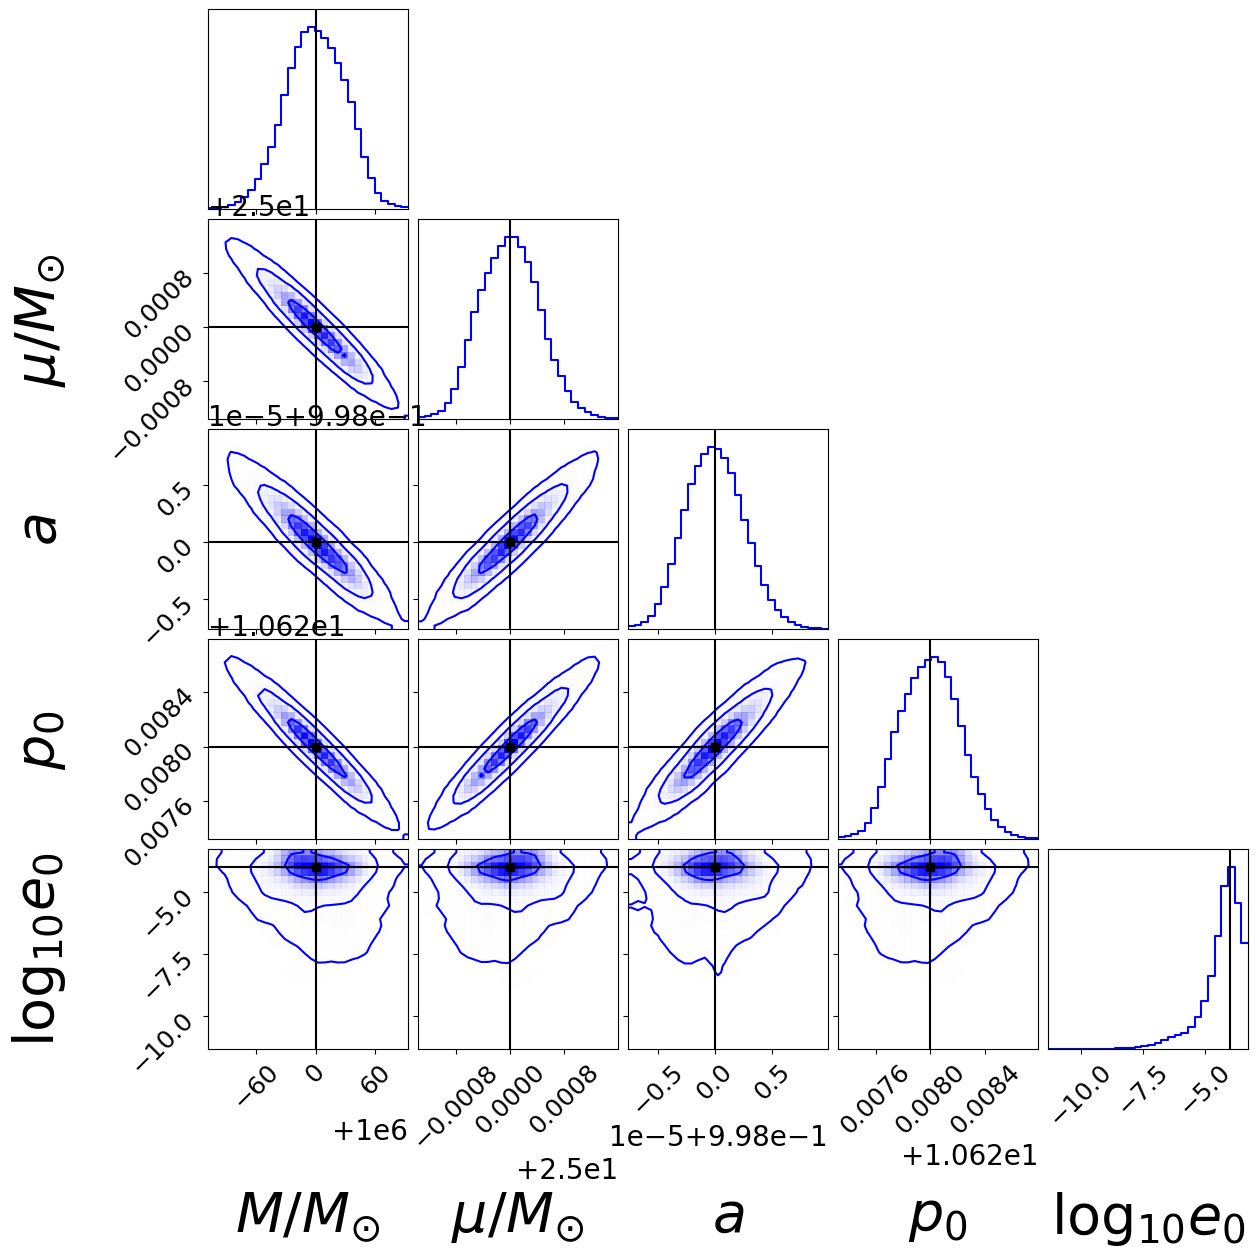

In [32]:
EMRI_plot_name_log_e0_neg4 = plot_direc + "/low_e0_Kerr_M_1e6_mu_25_a_0p998_p0_10p628_log_e0_0p0001_SNR_50_dt_5_T_2.h5.png"

# params_label =[r"$M/M_{\odot}$", r"$\mu/M_{\odot}$", r"$a$", 
#                      r"$p_{0}$", r"$e_{0}$", r"$D_{s}/Gpc$", 
#                      r"$\theta_{S}$", r"$\phi_{S}$", r"$\theta_{K}$", r"$\phi_{K}$", 
#                      r"$\Phi_{\phi_{0}}$", r"$\Phi_{r_{0}}$"] 

params_label_log_e0 =[r"$M/M_{\odot}$", r"$\mu/M_{\odot}$", r"$a$", 
                     r"$p_{0}$", r"$\log_{10}e_{0}$"] 

true_vals = np.array([1e6,25,0.998, 10.628, np.log10(0.0001), 7.28, 0.5, 1.2, 0.8, 0.2, 1.0, 3.0])

corner_kwargs = dict(plot_datapoints=False,smooth1d=True,
                       labels=params_label_log_e0, levels=(1 - np.exp(-0.5), 1 - np.exp(-2), 1 - np.exp(-9 / 2.)), 
                       label_kwargs=dict(fontsize=40), max_n_ticks=4,
                       show_titles=False, smooth = True, labelpad = 0.4)

figure_EMRI_0p0001 = corner_plot(samples_after_burnin_EMRI_log_e0_neg_4, true_vals, params_label_log_e0, corner_kwargs, plot_name = EMRI_plot_name_log_e0_neg4)

In [33]:
# Now in original variables

samples_after_burnin_EMRI_e0_0p0001 = samples_after_burnin_EMRI_log_e0_neg_4
samples_after_burnin_EMRI_e0_0p0001[0][:,4] = 10**samples_after_burnin_EMRI_e0_0p0001[0][:,4]



(34200, 12)


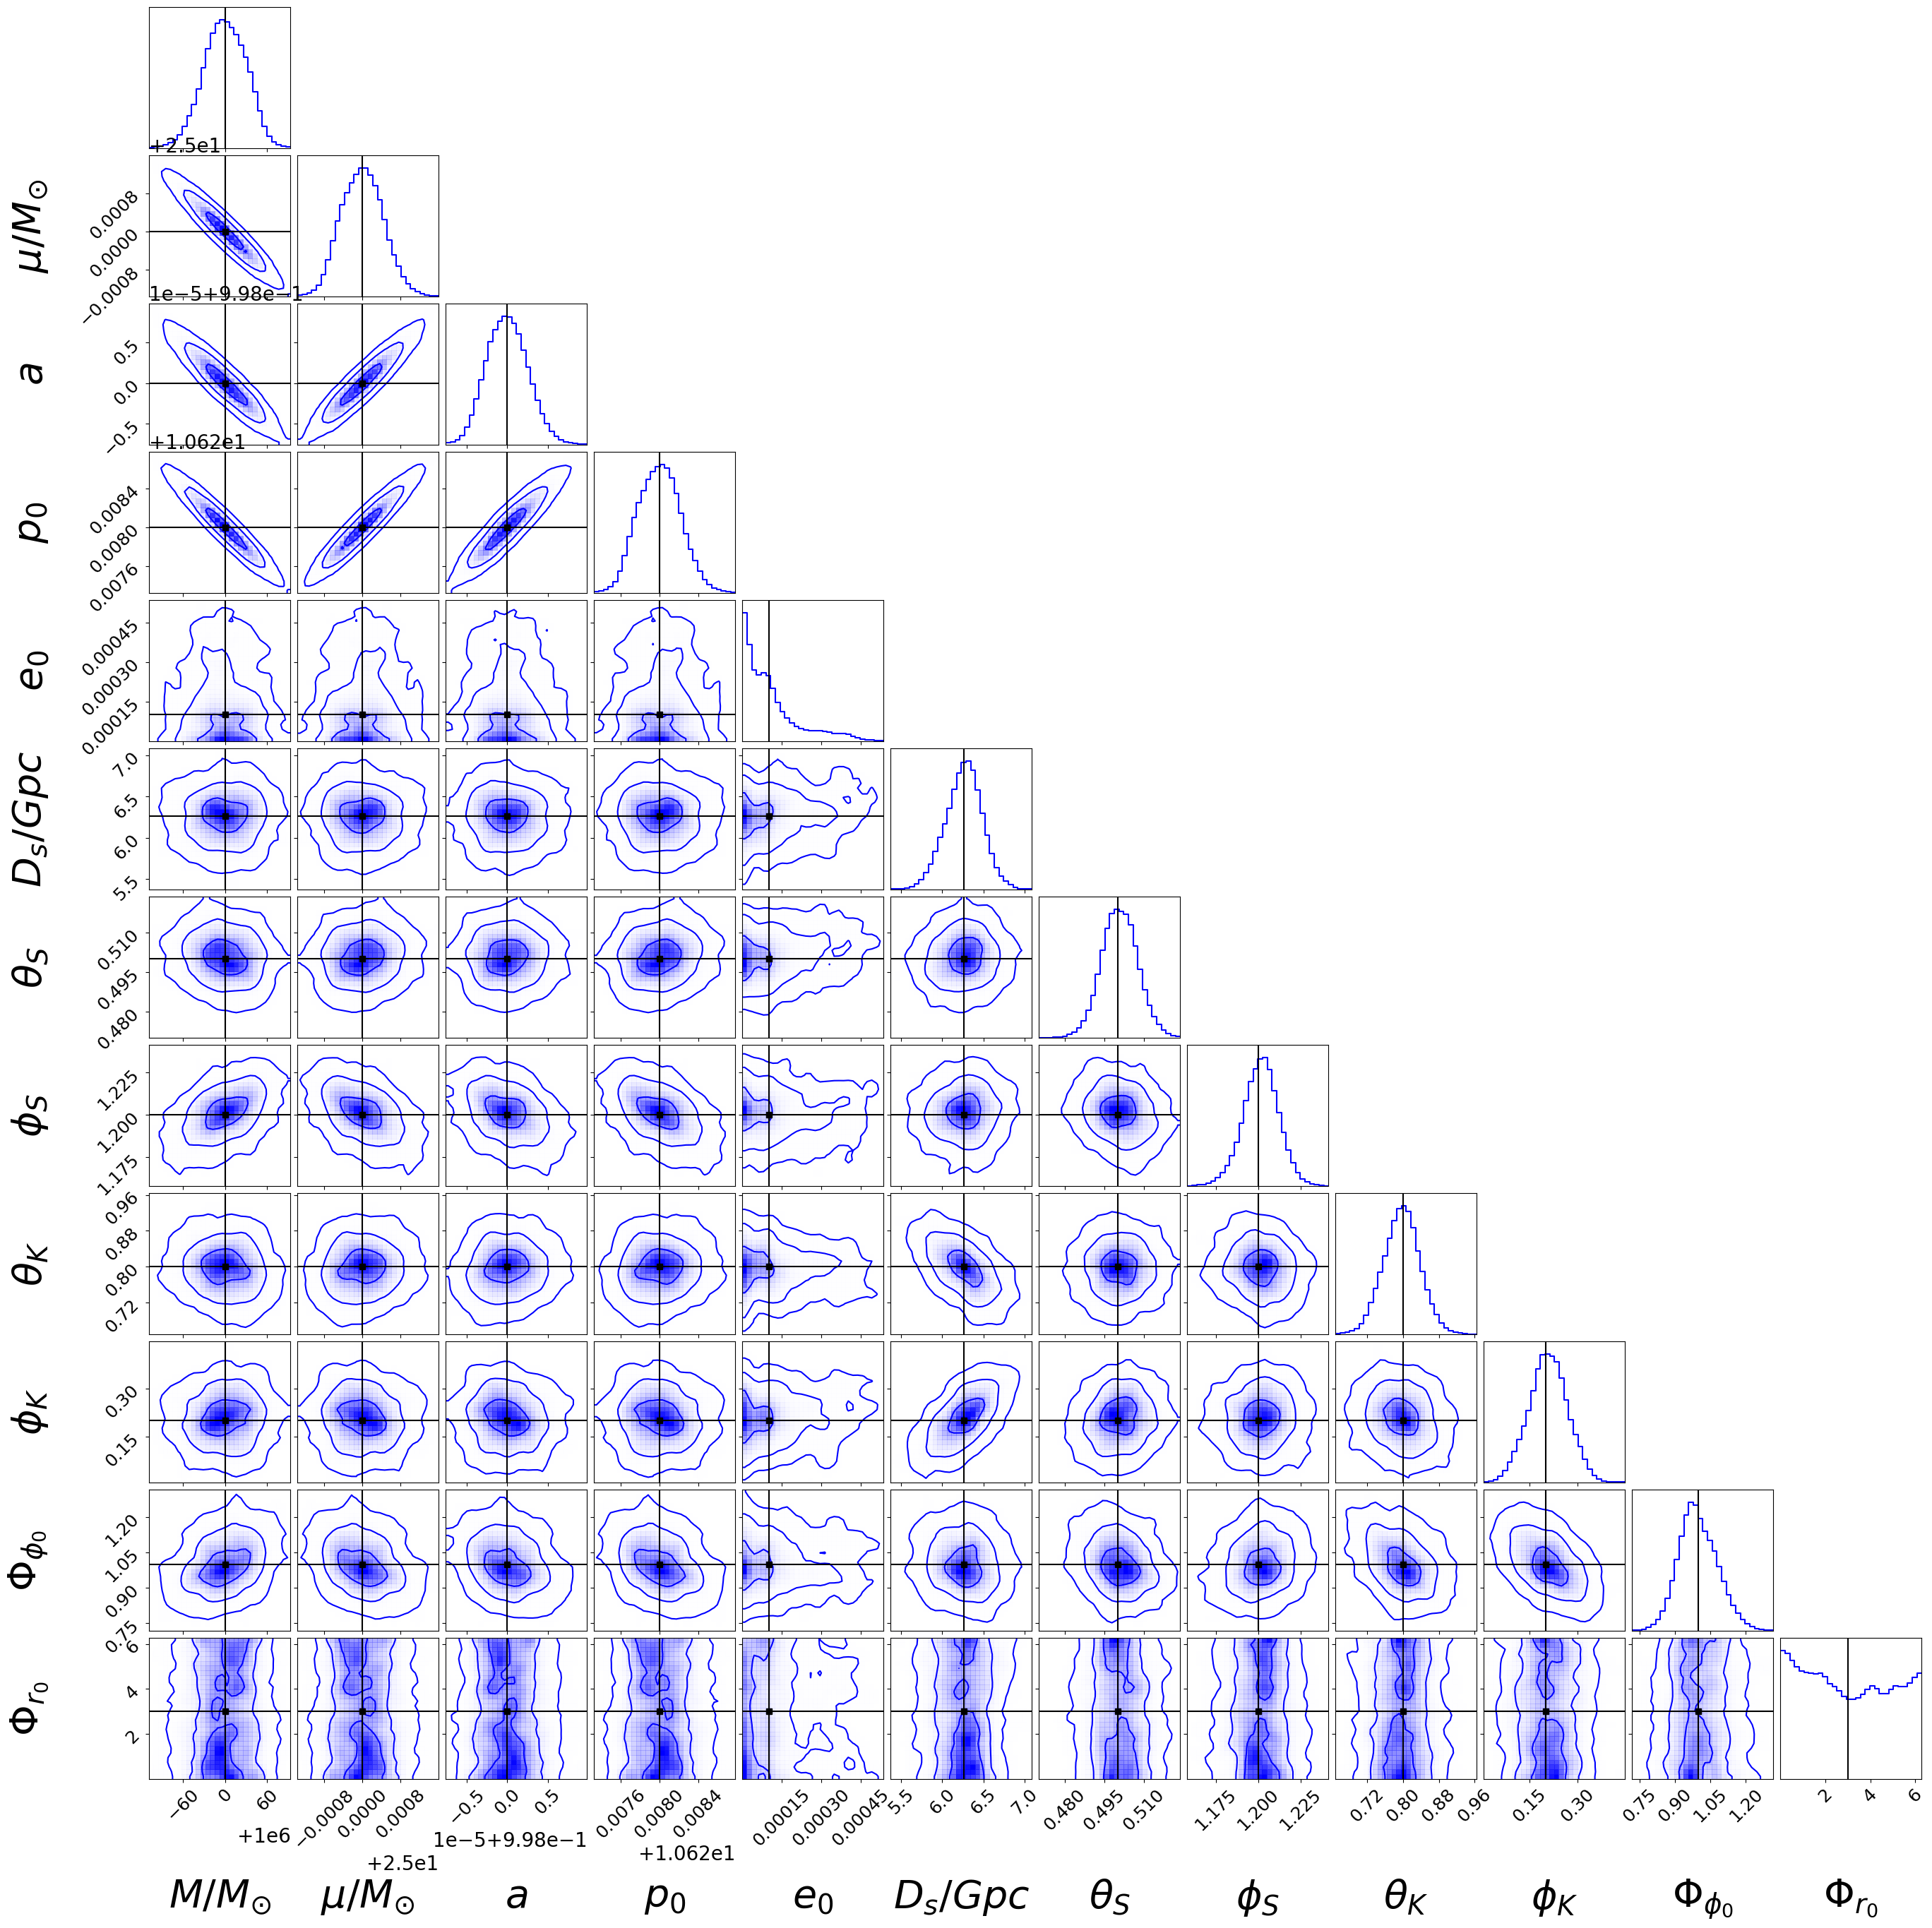

In [34]:
EMRI_plot_name_e0_0p0001 = plot_direc + "/low_e0_Kerr_M_1e6_mu_25_a_0p998_p0_10p628_e0_0p0001_SNR_50_dt_5_T_2.h5.png"

params_label_full =[r"$M/M_{\odot}$", r"$\mu/M_{\odot}$", r"$a$", 
                     r"$p_{0}$", r"$e_{0}$", r"$D_{s}/Gpc$", 
                     r"$\theta_{S}$", r"$\phi_{S}$", r"$\theta_{K}$", r"$\phi_{K}$", 
                     r"$\Phi_{\phi_{0}}$", r"$\Phi_{r_{0}}$"] 

dist_mean = np.mean(samples_after_burnin_EMRI_e0_0p0001[0][:,5])
true_vals = np.array([1e6,25,0.998, 10.628, 0.0001, dist_mean, 0.5, 1.2, 0.8, 0.2, 1.0, 3.0])

corner_kwargs = dict(plot_datapoints=False,smooth1d=True,
                       labels=params_label_full, levels=(1 - np.exp(-0.5), 1 - np.exp(-2), 1 - np.exp(-9 / 2.)), 
                       label_kwargs=dict(fontsize=40), max_n_ticks=4,
                       show_titles=False, smooth = True, labelpad = 0.4)

figure_EMRI_0p001 = corner_plot(samples_after_burnin_EMRI_e0_0p0001, true_vals, params_label_full, corner_kwargs, plot_name = EMRI_plot_name_e0_0p0001)


In [33]:
file_path = run_direc + 'low_e0_Kerr_M_1e6_mu_25_a_0p998_p0_10p628_e0_0p00001_SNR_50_dt_5_T_2.h5'

samples_after_burnin_EMRI_log_e0_neg_5, reader_EMRI_e0_0p00001, log_like_IMRI_EMRI_e0_0p00001, N_params = analyse_samples(file_path, discard = 0)

AttributeError: You must run the sampler with 'store == True' before accessing the results